# #DuBoisChallenge2024 Challenge 03

To do:

1. Load the data
2. Test visualisation(s)
3. Final visualisation

But first, we load the required packages:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from colors import dubois_colors
%matplotlib notebook

# 1. Load the data

Load the data using pandas:

In [22]:
df = pd.read_csv('2024/challenge03/data.csv')
df.head()

,1874,338769.000
0,1875,392643.234
1,1876,454213.787
2,1877,461910.106
3,1878,504239.862
4,1879,538873.298


Be careful, as the data does not have a column name. So we'll reload the data to take this into account by setting `header` to `None` and manually changing the column names.

In [23]:
df = pd.read_csv('2024/challenge03/data.csv', header=None)
df.columns=['year', 'acres']
df.head()

,year,acres
0,1874,338769.000
1,1875,392643.234
2,1876,454213.787
3,1877,461910.106
4,1878,504239.862


# 2: Test visualisations

Let's see how the data looks when plotting it as a bar chart:

<IPython.core.display.Javascript object>


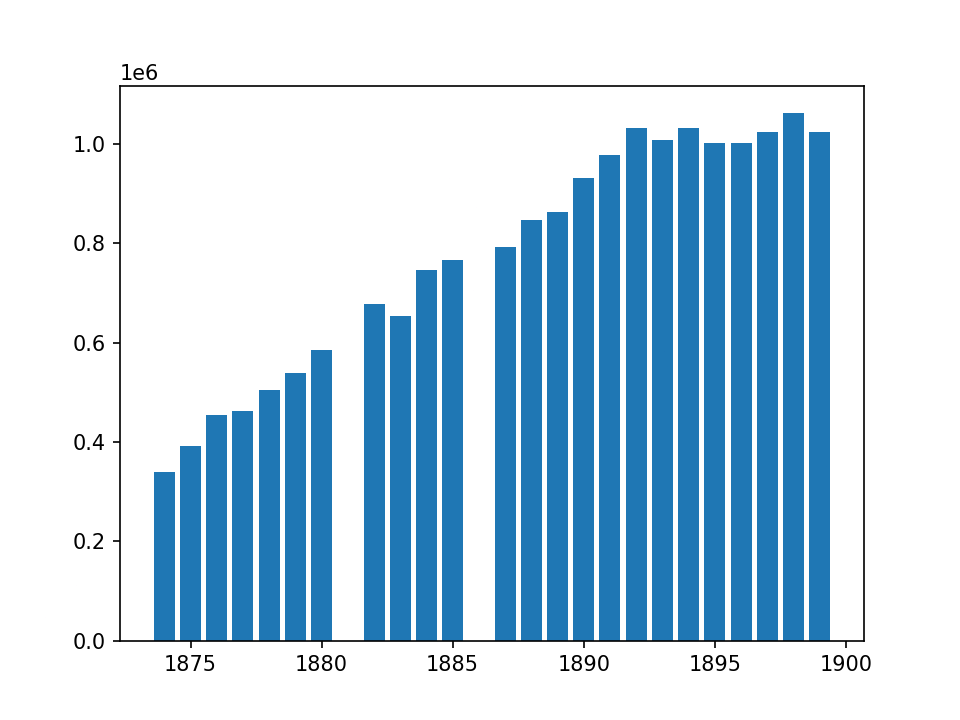

<BarContainer object of 25 artists>

In [112]:
fig, ax = plt.subplots()
ax.bar(df['year'], df['acres'])

It's interesting to see two gaps here. The years 1881 and 1886 don't have any data. So let's change the plot to use the indexes instead.

<IPython.core.display.Javascript object>


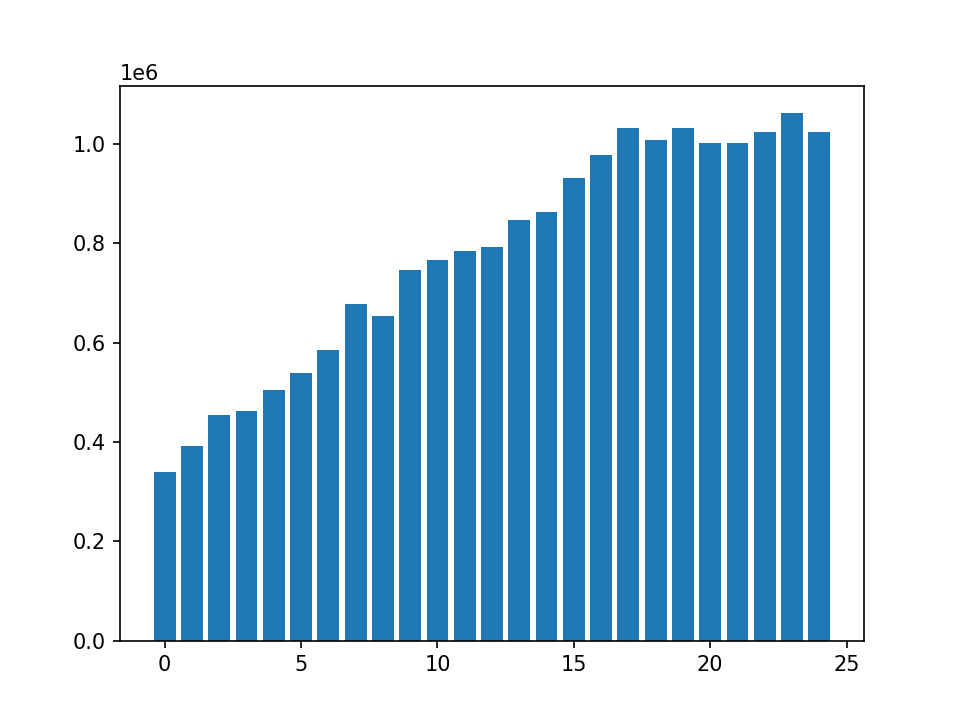

<BarContainer object of 25 artists>

In [31]:
fig, ax = plt.subplots()
ax.bar(df.index.values, df['acres'])

Better. Though the y-axis tick labels are gone. But we'll fix that later. 

Now let's swap it to a horizontal barchart.

<IPython.core.display.Javascript object>


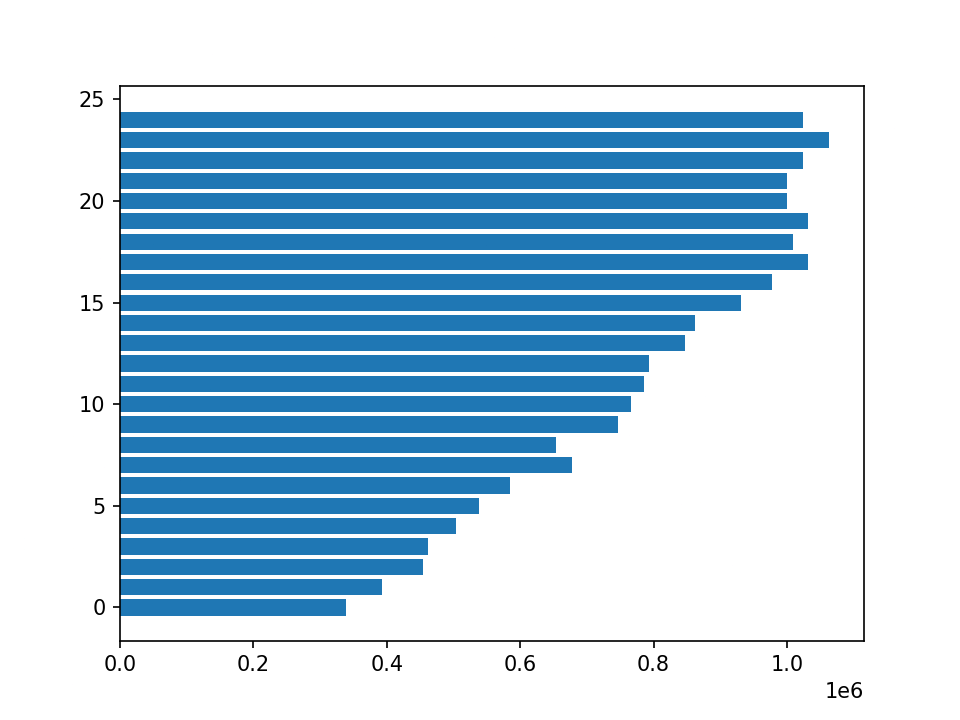

<BarContainer object of 25 artists>

In [113]:
fig, ax = plt.subplots()
ax.barh(df.index.values, df['acres'])

As you can see, the order is reversed. If we want to recreate the original, we need to flip the y-axis. We can do so using the set_ylim function:

<IPython.core.display.Javascript object>


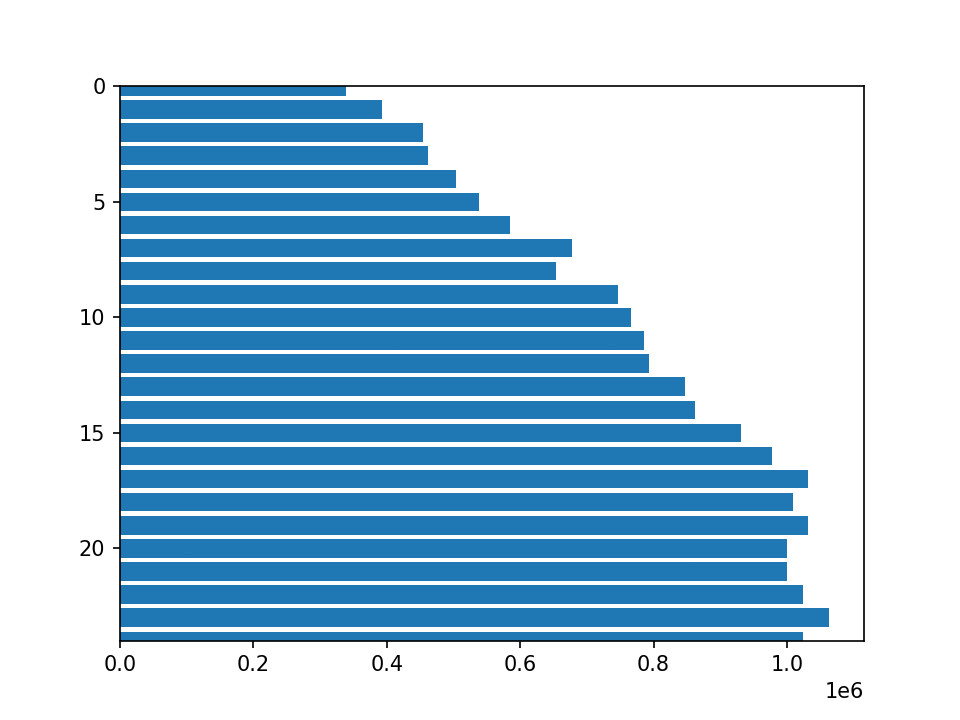

(24.0, 0.0)

In [37]:
fig, ax = plt.subplots()
ax.barh(df.index.values, df['acres'])
ax.set_ylim(max(df.index.values), 0)

Now, we have another issue. The first and last bar ar partly hidden. Let's give these bars some extra space by expanding the y limits:

<IPython.core.display.Javascript object>


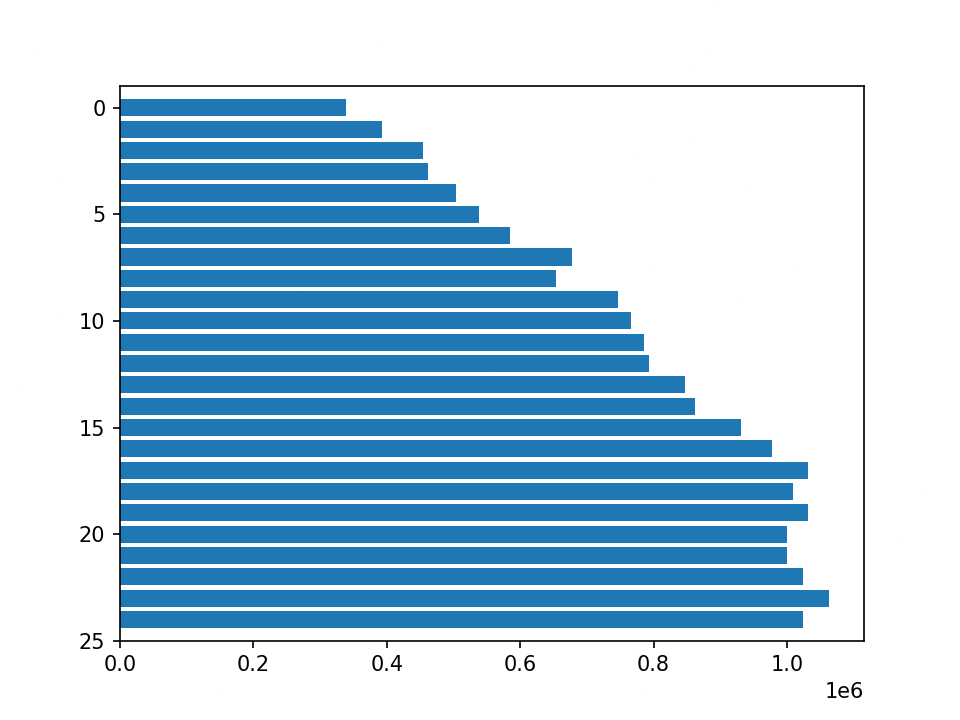

(25.0, -1.0)

In [38]:
fig, ax = plt.subplots()
ax.barh(df.index.values, df['acres'])
ax.set_ylim(max(df.index.values)+1, -1)

Alright. Done. Let's add Du Bois's style to it.

# 3. Final Visualisation

We are going to change a few things now:

1. Change the plot size. (As I plan to print my visuals when they are all done, I change it a bit from the previous two challenges. I now adopt an A-paper size ratio.)
2. Change colours
3. Remove axes
4. add y-axis tick year labels
5. add plot title
6. add annotations to the middle of the first and last bar
7. load custom fonts
8. give bars more margin
9. change overall plot margin

The code to all this is below. I added the number of the change in the list to the comment. It's a bit messy, but it helps you map each change to the code that does it.

<IPython.core.display.Javascript object>


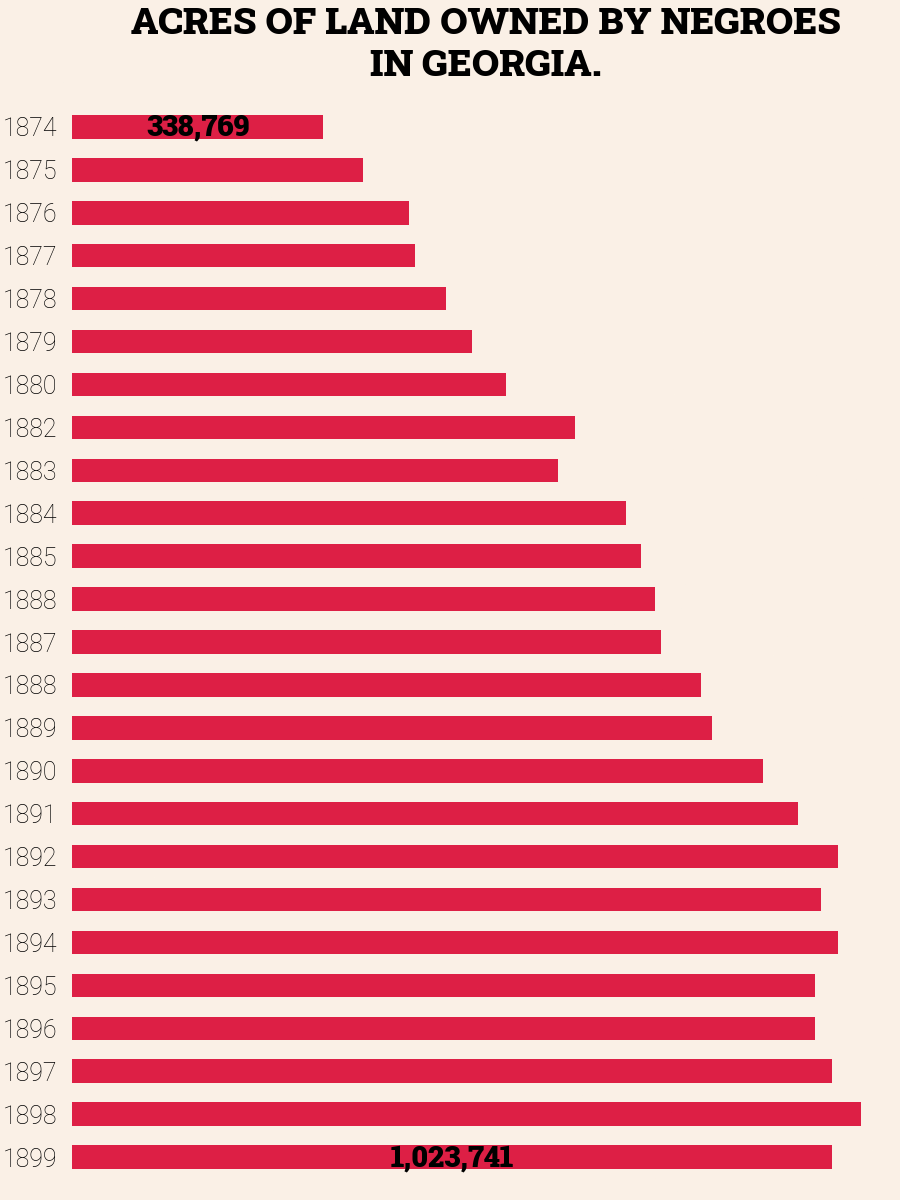

In [114]:
fig, ax = plt.subplots(   
    # 1. plot size
    figsize=(7.4,10.5), 
    # 2. change colors
    facecolor=dubois_colors['bg']
)

# 7. load custom fonts
rob_font_heavy = {'fontname':'Roboto Slab', 'fontweight': 'black'}
rob_font_light = {'fontname':'Roboto', 'fontweight': 'light'}

ax.barh(
    df.index.values, 
    df['acres'], 
    # 2. change colors & alpha
    color=dubois_colors['crimson'], 
    alpha=.95,
    # 8. add margin between bars by reducing bar height
    height=.55, 

)

# 3. Remove axes
ax.tick_params(left=False)
ax.patch.set_alpha(0)
ax.get_xaxis().set_visible(False)
ax.spines[['left', 'top', 'right', 'bottom']].set_visible(False)

# 4. set y tick labels & 7. Use fonts
ax.set_yticks(df.index.values, df['year'], fontsize=12, **rob_font_light)

ax.set_ylim(max(df.index.values)+1, -1)

# 5. Add plot title & 7. Use fonts
plt.title('ACRES OF LAND OWNED BY NEGROES\nIN GEORGIA.', pad=-5, fontsize=18, **rob_font_heavy)

# 6. Add annotations (1/2)
annotation_1 = int(df['acres'][0])
annotate_kwargs = {
    'fontsize': 14,
    'horizontalalignment': 'center',
    'verticalalignment': 'center',
}
ax.annotate(format(annotation_1,','), (annotation_1/2, 0+.01), **annotate_kwargs, **rob_font_heavy)

# 6. Add annotations (2/2)
last_index = len(df.index.values) - 1
annotation_2 = int(df['acres'][last_index])
ax.annotate(format(annotation_2,','), (annotation_2/2, last_index+.01), **annotate_kwargs, **rob_font_heavy)

# 9. change overall plot margin
plt.subplots_adjust(top=0.93, bottom=.00, left=0.08, right=1)

And for reference, the plot code without all the comments:

<IPython.core.display.Javascript object>


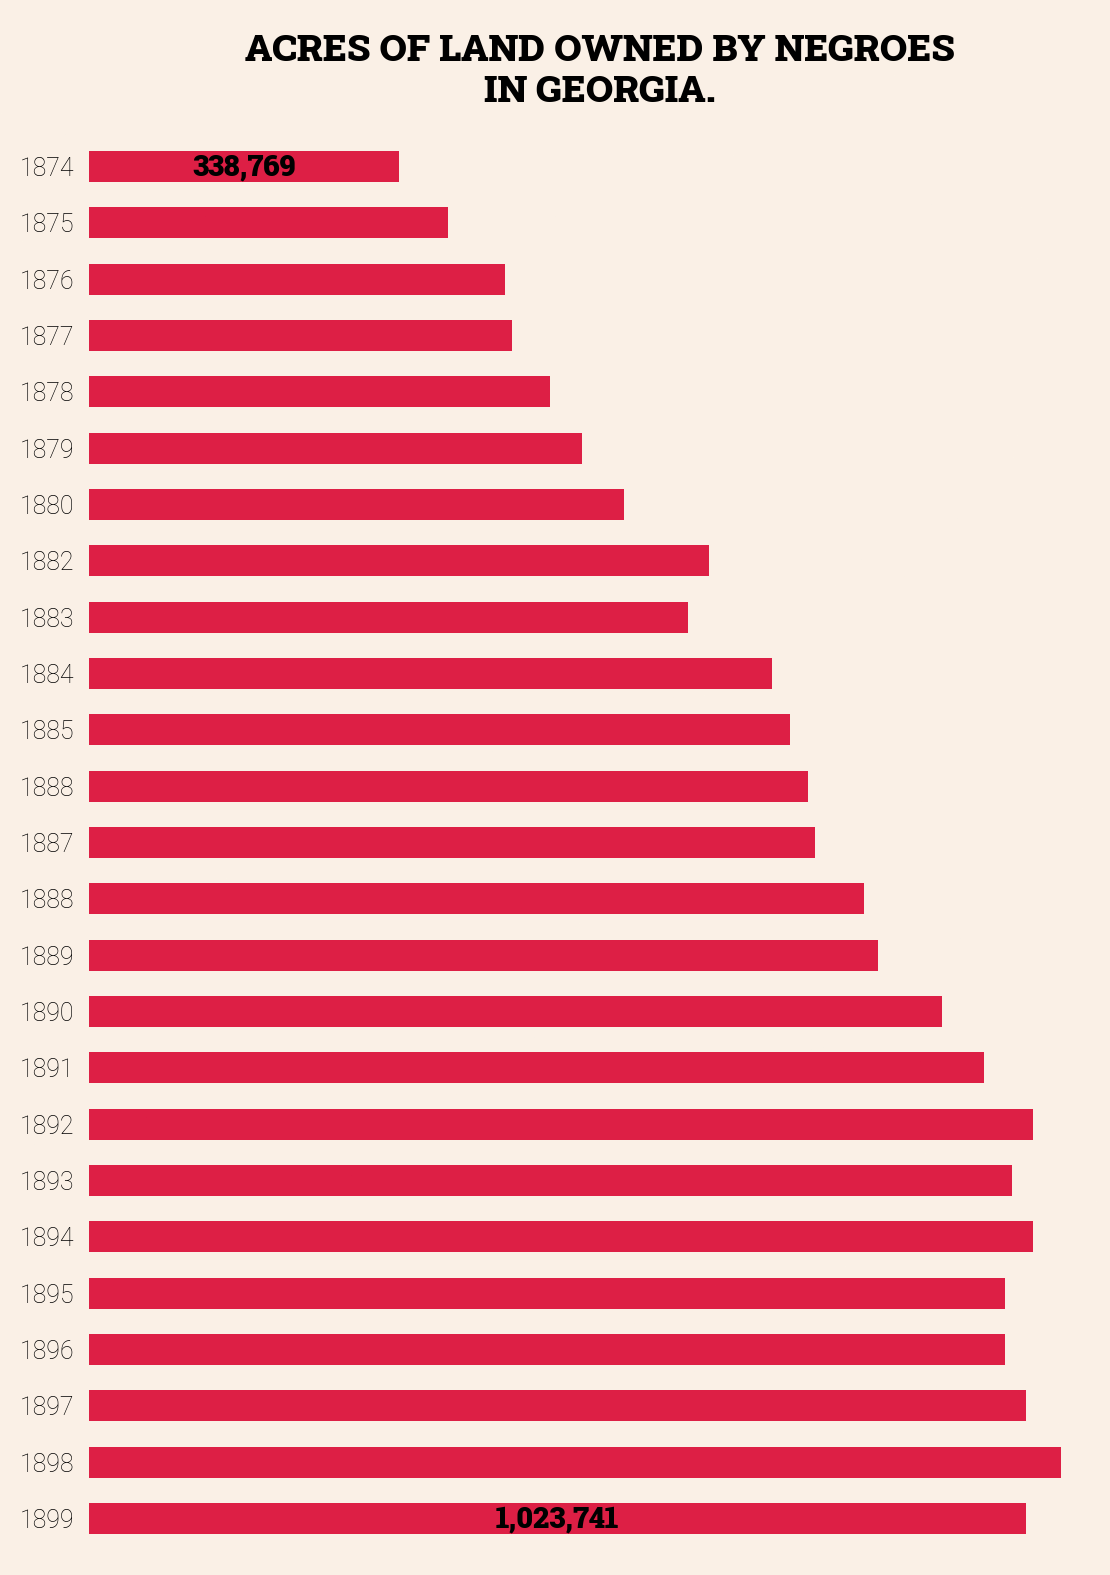

In [111]:
fig, ax = plt.subplots(   
    figsize=(7.4,10.5), 
    facecolor=dubois_colors['bg']
)

rob_font_heavy = {'fontname':'Roboto Slab', 'fontweight': 'black'}
rob_font_light = {'fontname':'Roboto', 'fontweight': 'light'}

ax.barh(df.index.values, df['acres'], color=dubois_colors['crimson'], height=.55, alpha=.95)

ax.tick_params(left=False)
ax.patch.set_alpha(0)
ax.get_xaxis().set_visible(False)
ax.spines[['left', 'top', 'right', 'bottom']].set_visible(False)

ax.set_yticks(df.index.values, df['year'], fontsize=12, **rob_font_light)
ax.set_ylim(max(df.index.values)+1, -1)

plt.title('ACRES OF LAND OWNED BY NEGROES\nIN GEORGIA.', pad=-5, fontsize=18, **rob_font_heavy)

annotation_1 = int(df['acres'][0])
annotate_kwargs = {
    'fontsize': 14,
    'horizontalalignment': 'center',
    'verticalalignment': 'center',
}
ax.annotate(format(annotation_1,','), (annotation_1/2, 0+.01), **annotate_kwargs, **rob_font_heavy)

last_index = len(df.index.values) - 1
annotation_2 = int(df['acres'][last_index])
ax.annotate(format(annotation_2,','), (annotation_2/2, last_index+.01), **annotate_kwargs, **rob_font_heavy)

plt.subplots_adjust(top=0.93, bottom=.00, left=0.08, right=1)